In [1]:
%matplotlib inline
import pylab as pl
import numpy as np
import sklearn.datasets as datasets
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = datasets.load_breast_cancer()

In [3]:
print("Shape of data:\t\t" + str(data.data.shape))
print("Shape of labels:\t" + str(data.target.shape))

Shape of data:		(569, 30)
Shape of labels:	(569,)


In [4]:
print("Feature Names:")
print(data.feature_names)
print("Label Names:")
print(data.target_names)

Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Label Names:
['malignant' 'benign']


In [5]:
X = data.data[:,0:10]
y = data.target
feature_names = data.feature_names[0:10]
print("Shape of X:\t\t" + str(X.shape))
print("Shape of y:\t\t" + str(y.shape))
print("Shape of feature_names:\t" + str(feature_names.shape))

Shape of X:		(569, 10)
Shape of y:		(569,)
Shape of feature_names:	(10,)


In [6]:
print("#Malignant Samples:\t", (y==0).sum())
print("#Benign Samples:\t", (y==1).sum())

#Malignant Samples:	 212
#Benign Samples:	 357


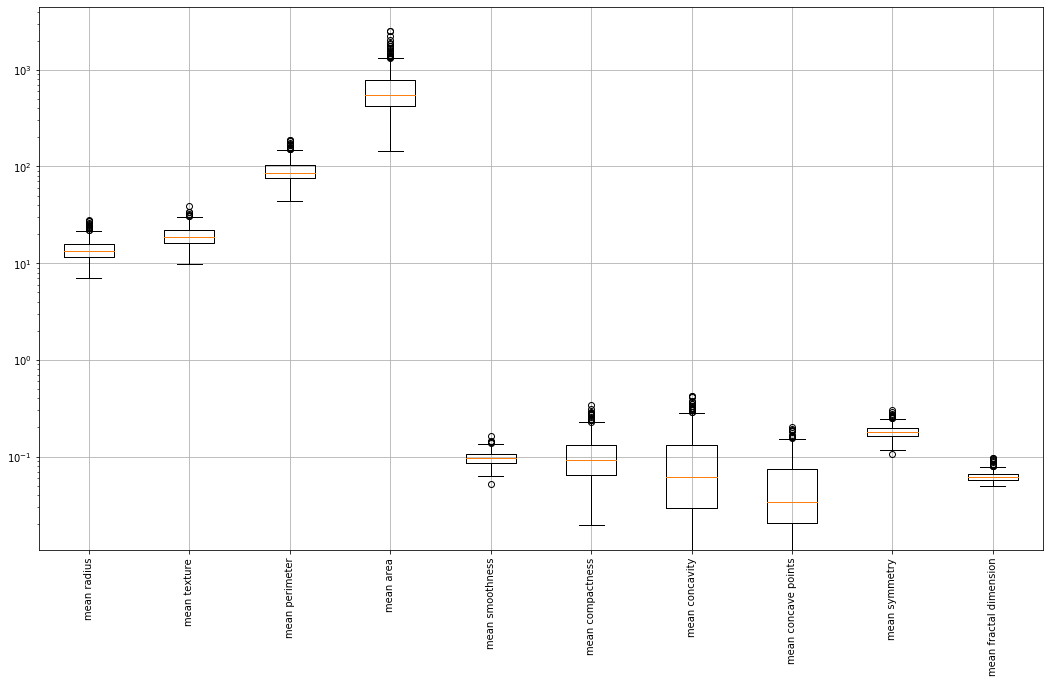

In [7]:
pl.figure(figsize=(18,10))
pl.boxplot(X)
pl.xticks(np.arange(1,11),feature_names,rotation=90)
pl.grid()
pl.yscale("log")

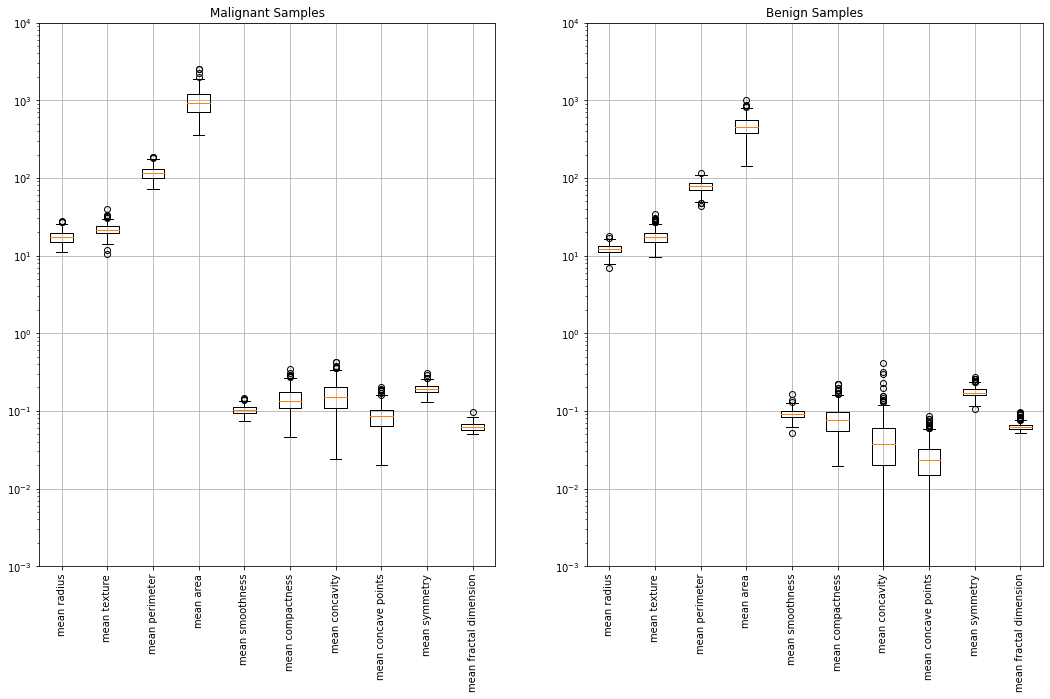

In [8]:
pl.figure(figsize=(18,10))
#One Row, Two Columns, First Image
pl.subplot(121)
pl.boxplot(X[y==0,:])
pl.title("Malignant Samples")
pl.xticks(np.arange(1,11),feature_names,rotation=90)
pl.grid()
pl.ylim([10**(-3),10**4])
pl.yscale("log")

pl.subplot(122)
pl.boxplot(X[y==1,:])
pl.title("Benign Samples")
pl.xticks(np.arange(1,11),feature_names,rotation=90)
pl.grid()
pl.ylim([10**(-3),10**4])
pl.yscale("log")

In [9]:
knn = KNeighborsClassifier(n_neighbors=1,algorithm="brute",metric="minkowski",p=2)
knn.fit(X, y) #training step, just stores data
predictions = knn.predict(X)

In [10]:
(predictions==y).sum()

569

In [11]:
knn = KNeighborsClassifier(n_neighbors=10,algorithm="brute",metric="minkowski",p=2)
knn.fit(X, y) #training step, just stores data
predictions = knn.predict(X)
(predictions==y).sum()

511

In [12]:
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [13]:
print("Shape Full Data:\t" + str(X.shape))
print("Shape Training Data:\t" + str(X_train.shape))
print("Shape Testing Data:\t" + str(X_test.shape))

Shape Full Data:	(569, 10)
Shape Training Data:	(455, 10)
Shape Testing Data:	(114, 10)


In [14]:
knn = KNeighborsClassifier(n_neighbors=1,algorithm="brute",metric="minkowski",p=2)
knn.fit(X_train, y_train) #training step, just stores data
predictions_test = knn.predict(X_test)
predictions_train = knn.predict(X_train)

accuracy_train = metrics.accuracy_score(y_train,predictions_train)
accuracy_test = metrics.accuracy_score(y_test,predictions_test)
print("Accuarcy (train):\t%.2f" % accuracy_train)
print("Accuarcy (test):\t%.2f" % accuracy_test)

Accuarcy (train):	1.00
Accuarcy (test):	0.86


In [16]:
neighbors = np.arange(1,51)
accuracy_train = []
accuracy_test = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm="brute",metric="minkowski",p=2)
    knn.fit(X_train, y_train) #training step, just stores data
    predictions_test = knn.predict(X_test)
    predictions_train = knn.predict(X_train)

    acc_train = metrics.accuracy_score(y_train,predictions_train)
    acc_test = metrics.accuracy_score(y_test,predictions_test) 
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)

best_k = neighbors[np.argmax(accuracy_test)]
print("Best k=" + str(best_k))
print("Best Accuarcy:%.2f" % np.max(accuracy_test))

Best k=5
Best Accuarcy:0.94


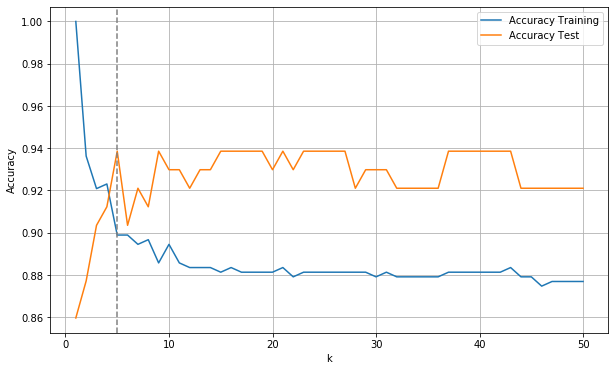

In [17]:
pl.figure(figsize=(10,6))
pl.grid()
pl.plot(neighbors, accuracy_train, label="Accuracy Training")
pl.plot(neighbors, accuracy_test, label="Accuracy Test")
pl.axvline(best_k,color="grey",linestyle="dashed")
pl.xlabel("k")
pl.ylabel("Accuracy")
pl.legend()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size = 0.2)

neighbors = np.arange(1,51)
accuracy_val = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,algorithm="brute",metric="minkowski",p=2)
    knn.fit(X_subtrain, y_subtrain) #training step, just stores data
    predictions_val = knn.predict(X_val)
    
    acc_val = metrics.accuracy_score(y_val,predictions_val) 
    accuracy_val.append(acc_val)

best_k = neighbors[np.argmax(accuracy_val)]
print("Best k=" + str(best_k))
print("Validation Accuarcy:%.2f" % np.max(accuracy_val))

#refit the model using the full training (subtraining + validation) using the best k value
knn = KNeighborsClassifier(n_neighbors=best_k,algorithm="brute",metric="minkowski",p=2)
knn.fit(X_train, y_train) #training step, just stores data
predictions_test = knn.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test,predictions_test)
print("Accuarcy on Test:\t%.2f" % test_accuracy)

Best k=28
Validation Accuarcy:0.93
Accuarcy on Test:	0.90


In [30]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10)

best_acc_val = []
best_acc_test = []
best_neighbors = []

counter = 0

for train_index, test_index in kf.split(X,y):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    #Internal Linesearch to find the optimal hyperparameter k
    X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, test_size = 0.2)

    neighbors = np.arange(1,51)
    accuracy_val = []

    for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,algorithm="brute",metric="minkowski",p=2)
        knn.fit(X_subtrain, y_subtrain) #training step, just stores data
        predictions_val = knn.predict(X_val)

        acc_val = metrics.accuracy_score(y_val,predictions_val) 
        accuracy_val.append(acc_val)

    best_k = neighbors[np.argmax(accuracy_val)]
    #print("Iteration " + str(counter))
    #print("Best k=" + str(best_k))
    #print("Validation Accuarcy:%.2f" % np.max(accuracy_val))

    #refit the model using the full training (subtraining + validation) using the best k value
    knn = KNeighborsClassifier(n_neighbors=best_k,algorithm="brute",metric="minkowski",p=2)
    knn.fit(X_train, y_train) #training step, just stores data
    predictions_test = knn.predict(X_test)
    test_accuracy = metrics.accuracy_score(y_test,predictions_test)
    
    best_acc_test.append(test_accuracy)
    best_neighbors.append(best_k)
    best_acc_val.append(np.max(accuracy_val))
    counter += 1
    
#convert python list into numpy list
best_neighbors = np.array(best_neighbors)
best_acc_test = np.array(best_acc_test)
best_acc_val = np.array(best_acc_val)

print("Average k: %.2f (+- %.2f)" % (best_neighbors.mean(), best_neighbors.std()) )
print("Accuracy (Val): %.2f (+- %.2f)" % (best_acc_val.mean(), best_acc_val.std()) )
print("Accuracy (Test): %.2f (+- %.2f)" % (best_acc_test.mean(), best_acc_test.std()) )

Average k: 8.80 (+- 10.58)
Accuracy (Val): 0.90 (+- 0.02)
Accuracy (Test): 0.88 (+- 0.05)
